In [0]:
#!unzip air-pollution-in-seoul.zip

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [4]:
# Retriving data for station code 106 for NO2
data_107=data[(data['Station code']==107) & (data['NO2']>0)]
print(len(data_107))
print(data_107.head(10))

25769
        Measurement date  Station code  ...  PM10  PM2.5
155405  2017-01-01 00:00           107  ...  64.0   40.0
155406  2017-01-01 01:00           107  ...  54.0   53.0
155407  2017-01-01 02:00           107  ...  65.0   48.0
155408  2017-01-01 03:00           107  ...  72.0   49.0
155409  2017-01-01 04:00           107  ...  67.0   38.0
155410  2017-01-01 05:00           107  ...  61.0   38.0
155411  2017-01-01 06:00           107  ...  60.0   36.0
155412  2017-01-01 07:00           107  ...  56.0   36.0
155413  2017-01-01 08:00           107  ...  58.0   35.0
155414  2017-01-01 09:00           107  ...  71.0   29.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


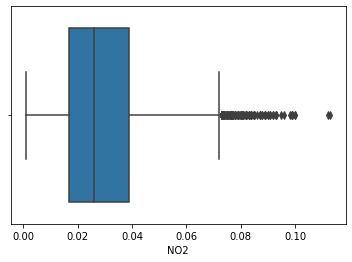

In [5]:
import seaborn as sns
sns.boxplot(data_107['NO2'])

25631


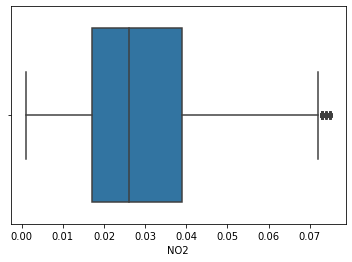

In [6]:
from scipy import stats
z = np.abs(stats.zscore(data_107['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_107_Rout = data_107[(z < 3)]
print(len(data_107_Rout))
sns.boxplot(data_107_Rout['NO2'])

In [7]:
df=data_107_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25631, 1)


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.075]
25631
0.0 1.0


In [9]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25626 [0.6486486486486487, 0.6081081081081081, 0.6351351351351352, 0.5675675675675675, 0.472972972972973]


In [10]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25626, 5)


,x1,x2,x3,x4,y
0,0.648649,0.608108,0.635135,0.567568,0.472973
1,0.608108,0.635135,0.567568,0.472973,0.445946
2,0.635135,0.567568,0.472973,0.445946,0.527027
3,0.567568,0.472973,0.445946,0.527027,0.500000
4,0.472973,0.445946,0.527027,0.500000,0.540541
5,0.445946,0.527027,0.500000,0.540541,0.540541
6,0.527027,0.500000,0.540541,0.540541,0.594595
7,0.500000,0.540541,0.540541,0.594595,0.567568
8,0.540541,0.540541,0.594595,0.567568,0.594595
9,0.540541,0.594595,0.567568,0.594595,0.608108


In [11]:
print(matrix[:,4])

[[0.47297297]
 [0.44594595]
 [0.52702703]
 ...
 [0.37837838]
 [0.33783784]
 [0.35135135]]


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8457, 1) [[0.40216385]
 [0.10089596]
 [0.22834856]
 [0.24557103]
 [0.43982606]]


In [13]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8716518278584587
[0.02874449]
[[ 0.03547076 -0.02267799 -0.1851219   1.0946984 ]]


In [14]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005528507908693859
absolute mean error :  0.05270435526171947
0.8634748625802228


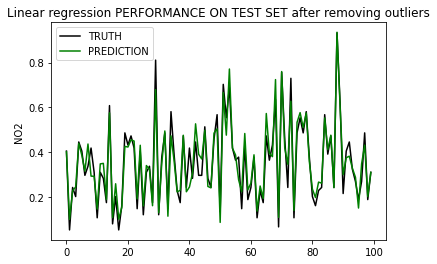

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(25769, 1)
[0.001] [0.113]
25769
0.0 1.0
25764 [0.4285714285714286, 0.40178571428571425, 0.41964285714285715, 0.37499999999999994, 0.3125]
(8503, 1) [[0.31194518]
 [0.40348895]
 [0.07629325]
 [0.37535815]
 [0.27468517]]
mean squared eror :  0.002430461552751362
absolute mean error :  0.03447890612520264
0.8716261009160562


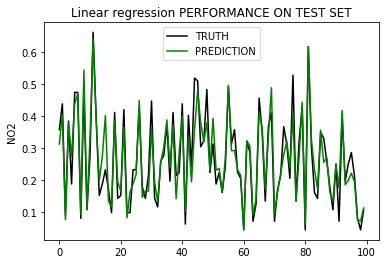

In [16]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_107['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [17]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0024304145208285297
absolute mean error :  0.034479053918983836
0.8716285850826165


In [18]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.002475126837041007
absolute mean error :  0.03489820860333352
0.8692669372043473


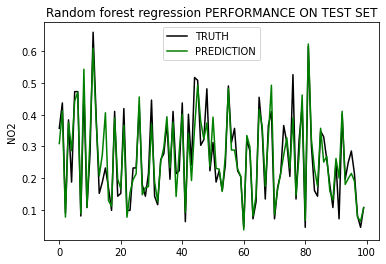

truth :  [[0.35714286]
 [0.4375    ]
 [0.08928571]
 [0.38392857]
 [0.1875    ]
 [0.47321429]
 [0.47321429]
 [0.08035714]
 [0.48214286]
 [0.10714286]]
prediction :  [0.30904927 0.41284841 0.07681113 0.37624424 0.286791   0.44324165
 0.47129681 0.08755324 0.54401588 0.10724307]


In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [20]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0024268986184555323
0.03451829984757835
0.8718142905902428


In [21]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.002455778430075253
absolute mean error :  0.034288317204519574
0.870288895539975


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


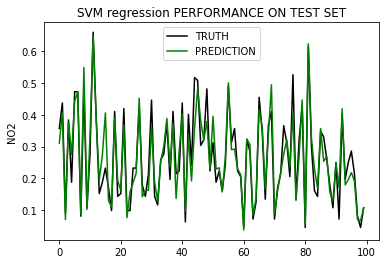

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
17261/17261 [==============================] - 1s 85us/step - loss: 0.0038 - accuracy: 1.7380e-04
Epoch 2/100
17261/17261 [==============================] - 1s 65us/step - loss: 0.0026 - accuracy: 1.7380e-04
Epoch 3/100
17261/17261 [==============================] - 1s 65us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 4/100
17261/17261 [==============================] - 1s 70us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 5/100
17261/17261 [==============================] - 1s 66us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 6/100
17261/17261 [==============================] - 1s 72us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 7/100
17261/17261 [==============================] - 1s 70us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 8/100
17261/17261 [==============================] - 1s 68us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 9/100
17261/17261 [==============================] - 1s 68us/step - loss: 0.0025 - accuracy: 1.7380e-04
Epoch 10/1

dict_keys(['loss', 'accuracy'])


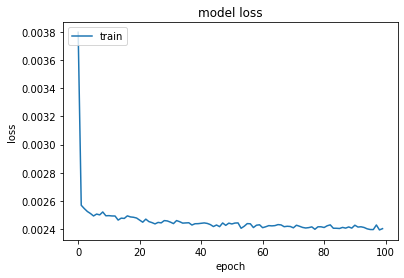

mean squared error :  0.0023841285169286107
mean absolute error :  0.034288317204519574
0.870288895539975


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


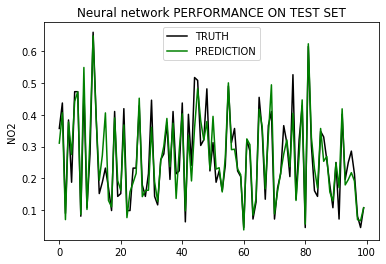

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [26]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.09821429 0.08035714 0.11607143 0.13392857]
 [0.19642857 0.22321429 0.25892857 0.32142857]
 [0.16964286 0.16071429 0.13392857 0.14285714]
 ...
 [0.26785714 0.25892857 0.25       0.19642857]
 [0.41964286 0.40178571 0.36607143 0.35714286]
 [0.23214286 0.25       0.22321429 0.25892857]]
(17261, 4)
(17261, 4, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17261/17261 [==============================] - 8s 492us/step - loss: 0.0088
Epoch 2/100
17261/17261 [==============================] - 7s 388us/step - loss: 0.0028
Epoch 3/100
17261/17261 [==============================] - 7s 391us/step - loss: 0.0026
Epoch 4/100
17261/17261 [==============================] - 7s 388us/step - loss: 0.0025
Epoch 5/100
17261/17261 [==============================] - 7s 382us/step - loss: 0.0025
Epoch 6/100
17261/17261 [==============================] - 7s 393us/step - loss: 0.0026
Epoch 7/100
17261/17261 [==============================] - 7s 402us/step - loss: 0.0025
Epoch 8/100
17261/17261 [==============================] - 7s 414us/step - loss: 0.0025
Epoch 9/100
17261/17261 [==============================] - 7s 406us/step - loss: 0.0025
Epoch 10/100
17261/17261 [==============================] - 7s 391us/step - loss: 0.0025
Epoch 11/100
17261/17261 [==============================] - 7s 382us/step - loss: 0.0025
Epoch 12/100
17261/17261 [====

dict_keys(['loss'])


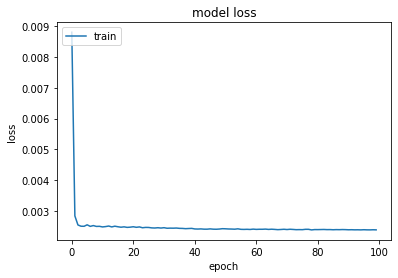

mean square error : 0.0025188369387132478
mean absolute error :  0.03617251172184361
0.8669582250279836


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

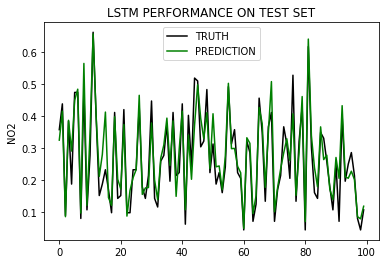

In [29]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')